In [2]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [3]:
# Seaborn comes with an example dataset to use as a pandas DataFrame
# https://github.com/mwaskom/seaborn-data
tips = sns.load_dataset('tips') # tip(n): 小費

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


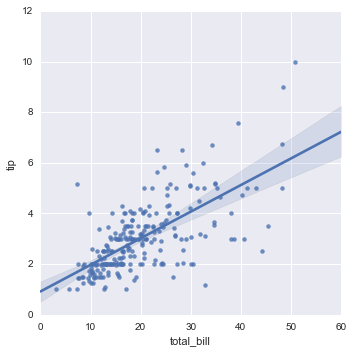

In [55]:
sns.lmplot('total_bill', 'tip', tips)

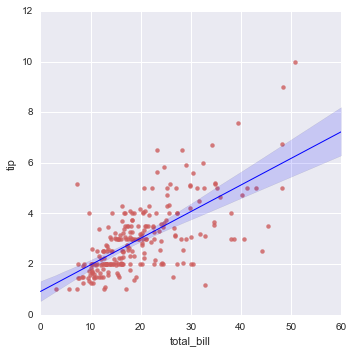

In [14]:
# scatter_kws / line_kws: Additional keyword arguments to pass to plt.scatter / plt.plot
sns.lmplot('total_bill', 'tip', tips,
           scatter_kws={'marker':'o', 'color':'indianred'},
           line_kws={'linewidth':1, 'color':'blue'})

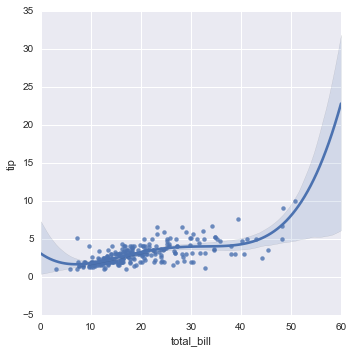

In [23]:
# Polynomial Regression
sns.lmplot('total_bill', 'tip', tips, order=4)

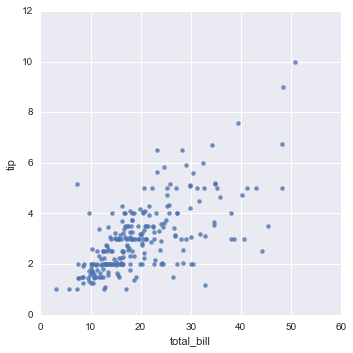

In [27]:
# Scatter only
sns.lmplot('total_bill', 'tip', tips, fit_reg=False)

In [29]:
# Add a new column
tips['tip_pect'] = 100*(tips['tip']/tips['total_bill'])

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


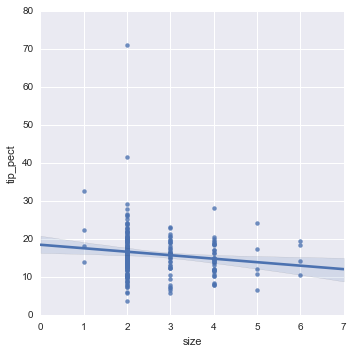

In [31]:
sns.lmplot('size', 'tip_pect', tips)

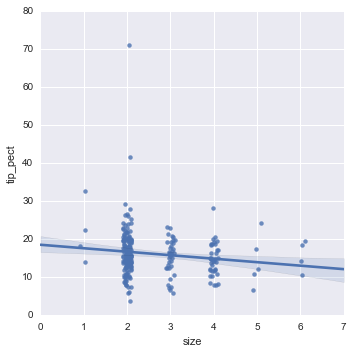

In [35]:
# 設定jitter讓scatter的位置比較好閱讀 (jitter: https://read01.com/nxKJok.html)
sns.lmplot('size', 'tip_pect', tips, x_jitter=.1)

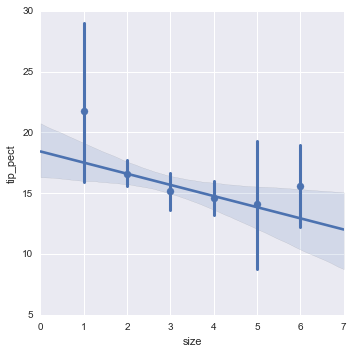

In [39]:
# x_estimator: Apply this function to each unique value of x and plot the resulting estimate
sns.lmplot('size', 'tip_pect', tips, x_estimator=np.mean) # 比較: 換成np.max?

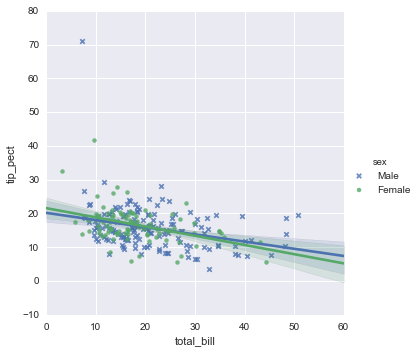

In [48]:
# hue + markers: 將point依指定分類顯示出來
sns.lmplot('total_bill', 'tip_pect', tips, hue='sex', markers=['x', 'o'])

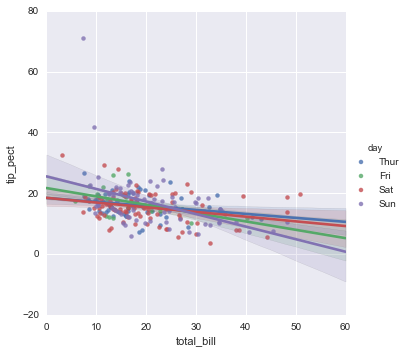

In [50]:
sns.lmplot('total_bill', 'tip_pect', tips, hue='day')

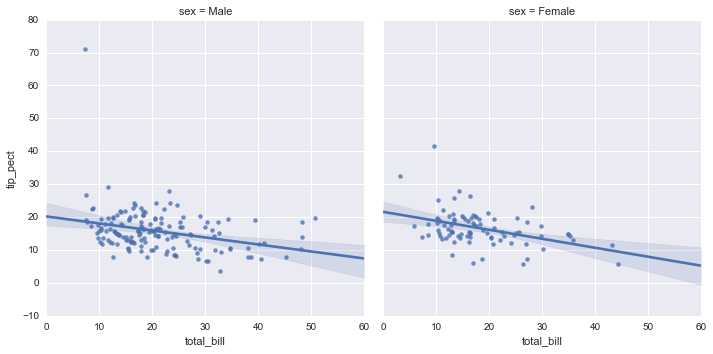

In [49]:
# col / row: 將point依指定分類分成個別的圖
sns.lmplot('total_bill', 'tip_pect', tips, col='sex')

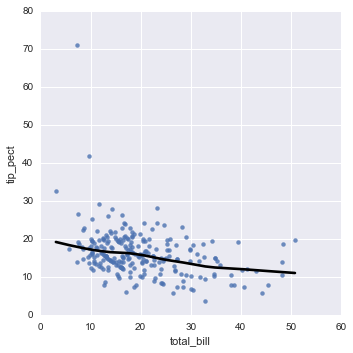

In [52]:
# Local Regression (https://en.wikipedia.org/wiki/Local_regression)
# 這邊不太清楚，猜測是將整個dataset切成區段(local)來做迴歸分析，區段越小迴歸分析越fit dataset
sns.lmplot('total_bill', 'tip_pect', tips, lowess=True,
           line_kws={'color':'black'})

# 不懂沒關係，用在很特定的分析

## `regplot`
### vs `lmplot`
Understanding the difference between regplot() and lmplot() can be a bit tricky. In fact, they are closely related, as lmplot() uses regplot() internally and takes most of its parameters. However, regplot() is an axes-level function, so it draws directly onto an axes (either the currently active axes or the one provided by the ax parameter), while lmplot() is a figure-level function and creates its own figure, which is managed through a FacetGrid. This has a few consequences, namely that regplot() can happily coexist in a figure with other kinds of plots and will follow the global matplotlib color cycle. In contrast, lmplot() needs to occupy an entire figure, and the size and color cycle are controlled through function parameters, ignoring the global defaults.

'\n\xe8\x8b\xa5\xe5\x8a\xa0\xe5\x85\xa5\xe9\x80\x99\xe4\xb8\x80\xe6\xae\xb5\xef\xbc\x8c\xe7\x9b\xb4\xe6\x96\xb9\xe5\x9c\x96\xe6\x9c\x83\xe4\xb8\x80\xe8\xb5\xb7\xe8\xa2\xab\xe7\x95\xab\xe4\xb8\x8a\xe5\x8e\xbb\xe8\x80\x8c\xe4\xb8\x8d\xe5\xbd\xb1\xe9\x9f\xbf\xe5\x8e\x9f\xe6\x9c\xac\xe7\x9a\x84regplot\ndataset = randn(1000)\nplt.hist(dataset)\n'

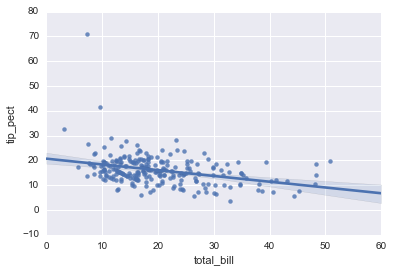

In [59]:
sns.regplot('total_bill', 'tip_pect', tips)

"""
若加入這一段，直方圖會一起被畫上去而不影響原本的regplot
dataset = randn(1000)
plt.hist(dataset)
"""

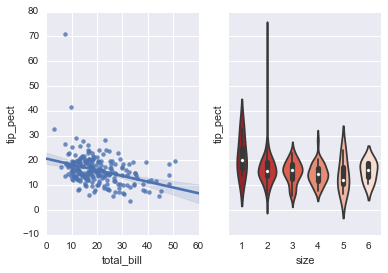

In [70]:
# reg_plot can be added to existing axes without modifying anything in the figure

# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1, 2, sharey=True) # share y: y軸一樣

sns.regplot("total_bill", "tip_pect", tips, ax=axis1)
sns.violinplot(tips['size'], tips['tip_pect'], palette='Reds_r', ax=axis2)